Observations and Insights:
1. The fist observation from the analysis is the correlation between mouse weight and average tumor volume is 0.84 representing a stronger positive correlation between the two variables.
2. The second observation from the analysis is that the drugs Capomulin and Ramicane were the most successful drugs at reducing the size of tumors in test mice, while Infubinol and Ceftamin were shown to be less effective.
3. The third observation from the pharmecutical test analysis was that the drugs Capomulin and Ramicane had the largest amount of test mice. also the male to female mice ratio was nearly identical with there being 2% more male mice in the study.

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [151]:
# Checking the number of mice.
mice = combined_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [152]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 

In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [155]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

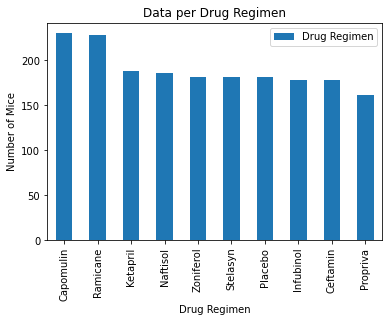

<Figure size 432x288 with 0 Axes>

In [158]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_total = pd.DataFrame(pd.value_counts(combined_df["Drug Regimen"]))

drugs_total.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

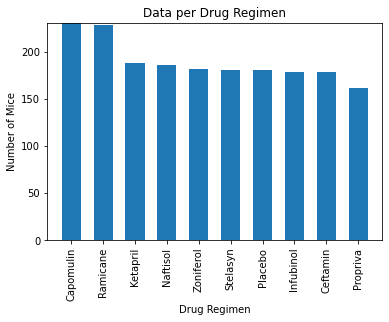

In [159]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = combined_df["Drug Regimen"].value_counts().index
y_axis = combined_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width = .6)
plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+0.4)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()


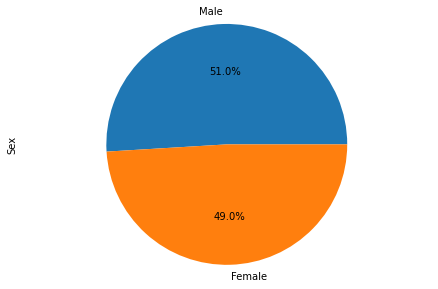

Male      958
Female    922
Name: Sex, dtype: int64

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_total = pd.value_counts(clean_df['Sex'])

gender_pandas = gender_total.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()
gender_total


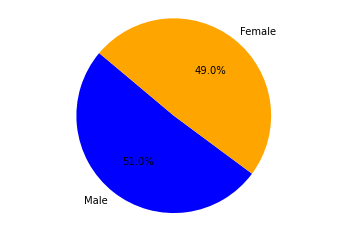

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [958, 922]
plt.pie(sizes, labels=["Male","Female"], colors=["blue","orange"], autopct='%1.1f%%', startangle=140)

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
ram_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
inf_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
ceft_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]

#Capomulin
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, combined_df, on=("Mouse ID","Timepoint"),how="left")

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers : below {lower_bound} and above {upper_bound}")

#Ramicane
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, combined_df, on=("Mouse ID","Timepoint"),how="left")

tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers : below {lower_bound2} and above {upper_bound2}")

#Infubinol
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, combined_df, on=("Mouse ID","Timepoint"),how="left")

tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers : below {lower_bound3} and above {upper_bound3}")

#Ceftamin
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, combined_df, on=("Mouse ID","Timepoint"),how="left")

tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers : below {lower_bound4} and above {upper_bound4}")  

Capomulin potential outliers : below 20.70456164999999 and above 51.83201549
Ramicane potential outliers : below 17.912664470000003 and above 54.30681135
Infubinol potential outliers : below 36.83290494999999 and above 82.74144559000001
Ceftamin potential outliers : below 25.355449580000002 and above 87.66645829999999


In [163]:
for x in tumors:
    if x < lower_bound:
        print(f"Capomulin potential outliers : {x}")
    if x > upper_bound:
        print(f"Capomulin potential outliers : {x}")
    
for x in tumors2:
    if x < lower_bound2:
        print(f"Ramicane potential outliers : {x}")
    if x > upper_bound2:
        print(f"Ramicane potential outliers : {x}")
    
for x in tumors3:
    if x < lower_bound3:
        print(f"Infubinol potential outliers : {x}")
    if x > upper_bound3:
        print(f"Infubinol potential outliers : {x}")
            
for x in tumors4:
    if x < lower_bound4:
        print(f"Ceftamin potential outliers : {x}")
    if x > upper_bound4:
        print(f"Ceftamin potential outliers : {x}")

Infubinol potential outliers : 36.321345799999996


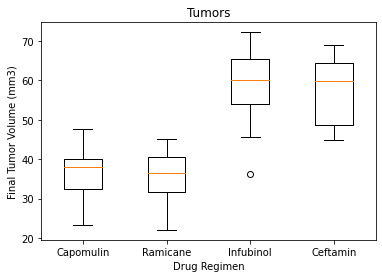

In [164]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and Scatter Plots

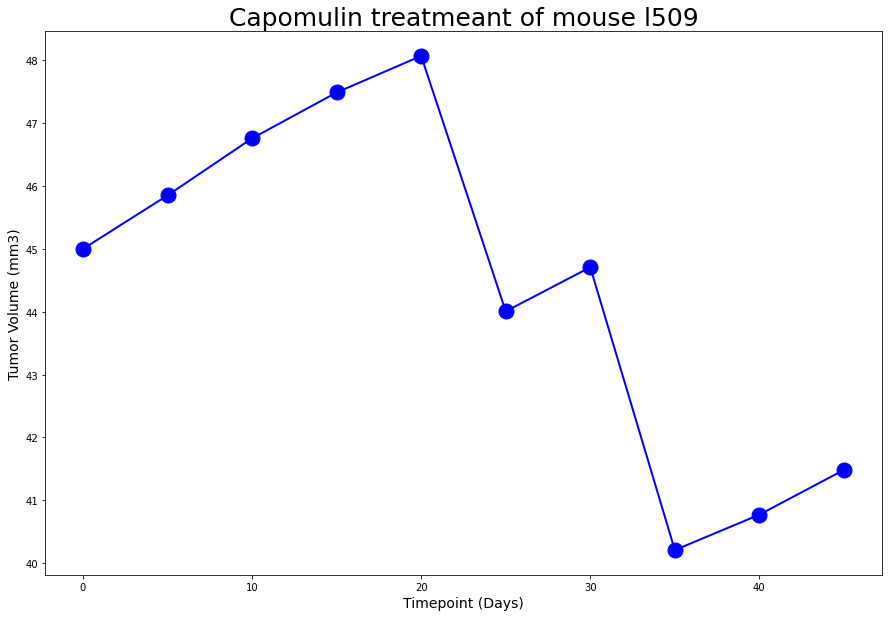

In [165]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]

x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse l509',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

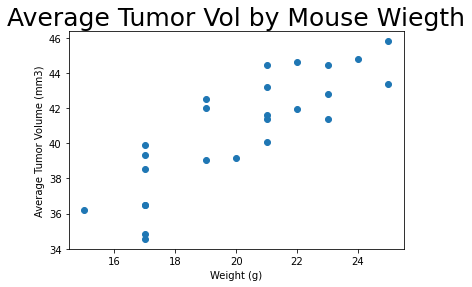

In [166]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.title('Average Tumor Vol by Mouse Wiegth',fontsize =25)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


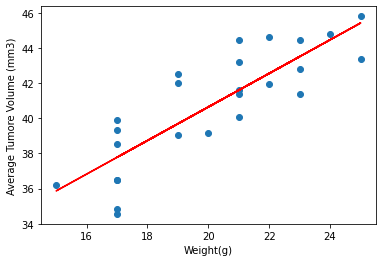

In [168]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()